<a href="https://colab.research.google.com/github/quiquefluque/Primera-prueba-/blob/main/Primer_analisis_(TESLA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2549711103.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', period='1y')
[*********************100%***********************]  1 of 1 completed


                Precio
Date                  
2025-02-14  355.839996
2025-02-18  354.109985
2025-02-19  360.559998
2025-02-20  354.399994
2025-02-21  337.799988
...                ...
2026-02-09  417.320007
2026-02-10  425.209991
2026-02-11  428.269989
2026-02-12  417.070007
2026-02-13  417.440002

[251 rows x 1 columns]
La volatilidad el ultimo año es de 0.038799435155073
La mediad de retornos el ultimo año es de 0.00138703324348739
El precio actual es 417.44000244140625


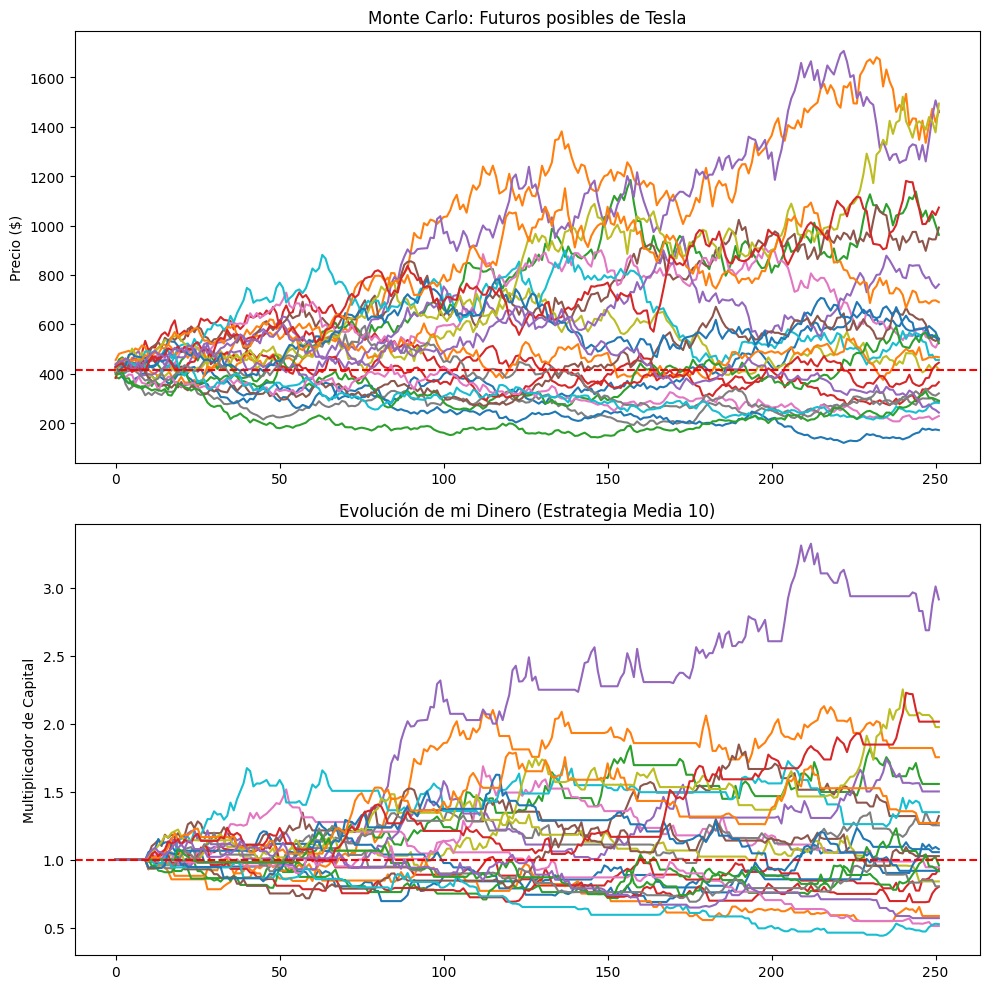

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Bajamos los datos de Tesla (TSLA) del último año
df = yf.download('TSLA', period='1y')

# (A veces yfinance devuelve nombres de columnas complejos, así lo simplificamos,solo al precio de cierre
df = df[['Close']].copy()
df.columns = ['Precio'] #cambiar nombre columna

print(df)

#CALCULOS PASADOS

#calculo retornos
df["Retornosreales"]=df["Precio"].pct_change()
#calculo la volatilidad pasada
vol_pasada = np.std (df["Retornosreales"])
print(f"La volatilidad el ultimo año es de {vol_pasada}")
#calculo la media de retonos pasada
media_pasada = np.mean (df["Retornosreales"])
print(f"La mediad de retornos el ultimo año es de {media_pasada}")

#MONTE CARLO SITUACIONES FUTURAS


# retornos ficticios proximo año
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) #2filas de graficos y 1 columna

precio_inicial=df["Precio"].iloc[-1] #ultimo valor de la acción
print(f"El precio actual es {precio_inicial}")
for i in range(25):
  #recortadar que hace de golpe los 252 precios futuros por cada iteracion del bucle con el size
  retornos_simulados = np.random.normal(media_pasada, vol_pasada, size=252)
  multiplicadores=1+retornos_simulados
  preciosanofut= precio_inicial*multiplicadores.cumprod()
  ax1.plot(preciosanofut)

  #BOT en esa situación

  df_sim = pd.DataFrame(preciosanofut, columns=['PrecioSimulado'])
  df_sim["mediafut"]=df_sim["PrecioSimulado"].rolling(window=10).mean()
  df_sim["ordencompra"]=np.where(df_sim["PrecioSimulado"]>df_sim["mediafut"],1,0)
  #si ayer compre gano ese retorno, si no compre no gano nada
  df_sim['RetornoganadoRobot'] = df_sim['PrecioSimulado'].pct_change() * df_sim['ordencompra'].shift(1)
  #acumulacion de dinero empezando con 1 euro
  df_sim['Wins'] = (1 + df_sim['RetornoganadoRobot'].fillna(0)).cumprod()
  ax2.plot(df_sim['Wins'])


#TABLAS
ax1.set_title("Monte Carlo: Futuros posibles de Tesla")
ax1.set_ylabel("Precio ($)")

ax2.set_title("Evolución de mi Dinero (Estrategia Media 10)")
ax2.set_ylabel("Multiplicador de Capital")

ax1.axhline(df["Precio"].iloc[-1], color='red', linestyle='--') # Línea de precio inicia
ax2.axhline(1, color='red', linestyle='--') # Línea de "no ganar ni perder"
plt.tight_layout() # Para que no se amontonen los títulos
plt.show()



















